In [148]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
from RiskReturn import *
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:

start = dt.datetime(1980,1,2)
end = dt.datetime.today()
SPY_prices_daily = pdr.get_data_yahoo(['SPY', 'GLD'], start=start, end=end)
SPY_prices_monthly = SPY_prices_daily['Adj Close'].resample('M').last()
SPY_returns_monthly = SPY_prices_monthly.pct_change().dropna()
SPY_returns_monthly

[*********************100%***********************]  2 of 2 completed


,GLD,SPY
Date,,
2004-12-31,-0.029255,0.030121
2005-01-31,-0.036073,-0.022421
2005-02-28,0.031028,0.020904
2005-03-31,-0.016311,-0.018293
2005-04-30,0.012377,-0.018735
...,...,...
2020-07-31,0.107905,0.058892
2020-08-31,-0.003236,0.069797
2020-09-30,-0.041714,-0.037444


In [47]:
my_object = RiskReturn(return_series=SPY_returns_monthly, periodicity='M')

In [48]:

semi_deviation(SPY_returns_monthly, 'M')

GLD    0.101517
SPY    0.115230
dtype: float64

<AxesSubplot:xlabel='Date'>

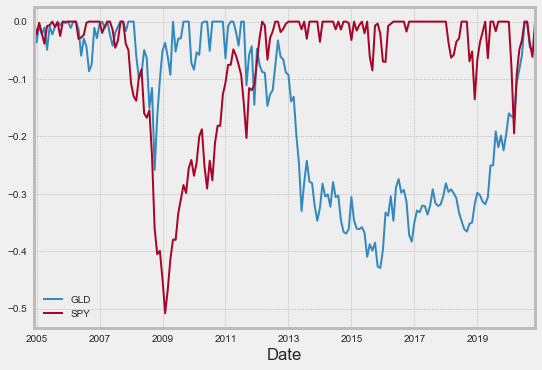

In [49]:

my_object.get_drawdown().plot()

In [138]:
w = np.array([0.5,0.5])
q = w @ SPY_returns_monthly.transpose()
q

Date
2004-12-31    0.000433
2005-01-31   -0.029247
2005-02-28    0.025966
2005-03-31   -0.017302
2005-04-30   -0.003179
                ...   
2020-07-31    0.083398
2020-08-31    0.033281
2020-09-30   -0.039579
2020-10-31   -0.015064
2020-11-30    0.042636
Freq: M, Length: 192, dtype: float64

In [151]:
portfolio_volatility(SPY_returns_monthly, w)

NameError: name 'portfolio_volatility' is not defined